# Define peak positions


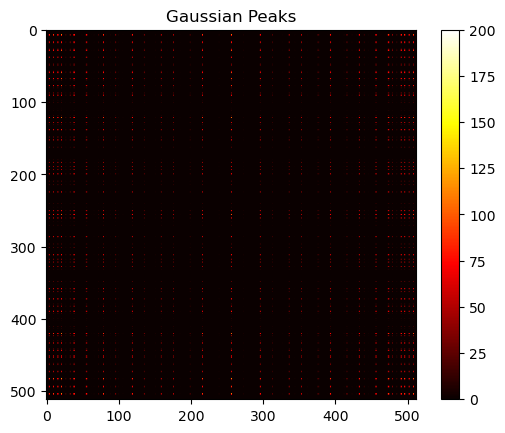

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cupy as cp

def gaussian_2d(x, y, x0, y0, sigma_x, sigma_y, total_intensity):
    """Gaussian peak simulation."""
    return total_intensity * np.exp(-((x - x0)**2 / (2 * sigma_x**2) + (y - y0)**2 / (2 * sigma_y**2)))

def generate_gaussian_peak_array(size, sigma_x, sigma_y, freq_x, freq_y, shift_x, shift_y, total_intensity):
    #array = np.zeros((size, size))
    x = np.linspace(0, size - 1, size)
    y = np.linspace(0, size - 1, size)
    x_grid, y_grid = np.meshgrid(x, y)

    x0 = (size / 2) * (1 + np.sin(2 * np.pi * freq_x * (x_grid+ shift_x) / size)) 
    y0 = (size / 2) * (1 + np.sin(2 * np.pi * freq_y * (y_grid+ shift_y) / size)) 
    # for i in range(size):
    #     for j in range(size):
    #         array[i, j] = gaussian_2d(x_grid[i, j], y_grid[i, j], x0[i, j], y0[i, j], sigma_x, sigma_y, total_intensity)
    #array[:,:] = gaussian_2d(x_grid[:,:], y_grid[:,:], x0[:,:], y0[:,:], sigma_x, sigma_y, total_intensity)
    
    #the functions in guassian_2d can also be broadcasted so array is initialized through vectorizing the parameters
    array = gaussian_2d(x_grid, y_grid, x0, y0, sigma_x, sigma_y, total_intensity)

    return array

size = 512
sigma_x = 14
sigma_y = 20
freq_x = 90
freq_y = 50
shift_x = 0 
shift_y = 0 
total_intensity = 200  


peak_positions = generate_gaussian_peak_array(size, sigma_x, sigma_y, freq_x, freq_y, shift_x, shift_y, total_intensity)

plt.imshow(peak_positions, cmap='hot')
plt.colorbar()
plt.title('Gaussian Peaks')
plt.show()


# Define scan positions

In [3]:
import time

In [18]:
def generate_raster_scan_positions(size):
    x_positions = np.zeros(shape=(size,size), dtype=np.int8)
    y_positions = np.zeros(shape=(size,size), dtype=np.int8)

    x_positions[::2] += np.arange(size)
    x_positions[1::2] += np.arange(size-1,-1,-1)
    x_positions = x_positions.ravel()   

    y_positions+= np.arange(size)[:,np.newaxis]
    y_positions = y_positions.ravel()
    
    return np.array(x_positions), np.array(y_positions)


size = 1000
time1 = time.time()
x_positions, y_positions = generate_raster_scan_positions(size)
time2 = time.time()
delta = time2-time1
print(delta)
print(x_positions)

0.00922393798828125
[0 1 2 ... 2 1 0]


In [5]:
# def generate_raster_scan_positions(size):
#     x_positions , y_positions = np.meshgrid(np.arange(size), np.arange(size))

#     x_positions = np.where(y_positions%2 == 0, x_positions, x_positions[:,::-1])

#     x_positions = x_positions.ravel() 
#     y_positions = y_positions.ravel()
    
#     return np.array(x_positions), np.array(y_positions)

# size = 10000
# time1 = time.time()
# x_positions, y_positions = generate_raster_scan_positions(size)
# time2 = time.time()
# delta = time2-time1
# print(delta)
# print(x_positions)

In [6]:

# def generate_raster_scan_positions(size):
#     x_positions = []
#     y_positions = []
    
#     for i in range(size):
#         if i % 2 == 0:  # Even rows
#             for j in range(size):
#                 x_positions.append(j)
#                 y_positions.append(i)
#         else:  # Odd rows
#             for j in range(size-1, -1, -1):  # Reverse iteration for odd rows
#                 x_positions.append(j)
#                 y_positions.append(i)
    
#     return np.array(x_positions), np.array(y_positions)


# size = 10024
# time1 = time.time()
# x_positions, y_positions = generate_raster_scan_positions(size)
# time2 = time.time()
# delta = time2-time1
# print(delta)

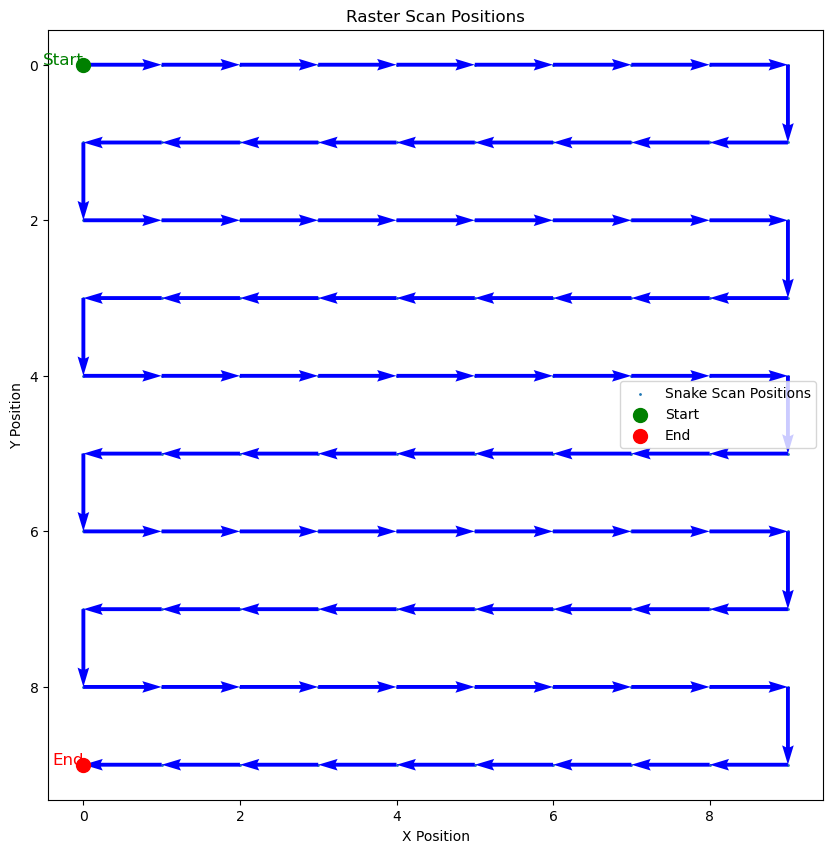

In [7]:

def generate_raster_scan_positions(size):
    x_positions = np.zeros(shape=(size,size), dtype=np.int8)
    y_positions = np.zeros(shape=(size,size), dtype=np.int8)

    x_positions[::2] += np.arange(size)
    x_positions[1::2] += np.arange(size-1,-1,-1)
    x_positions = x_positions.ravel() 

    y_positions+= np.arange(size)[:,np.newaxis]
    y_positions = y_positions.ravel()
    
    return np.array(x_positions), np.array(y_positions)

size = 10
time1 = time.time()
x_positions, y_positions = generate_raster_scan_positions(size)
time2 = time.time()
delta = time2-time1
# print(delta)

size = 10
x_positions, y_positions = generate_raster_scan_positions(size)


def plot_scan_positions(x_positions, y_positions, title='Scan Positions', scan_type='Snake'):
    u = np.diff(x_positions)
    v = np.diff(y_positions)

    u = np.append(u, 0)
    v = np.append(v, 0)

    plt.figure(figsize=(10, 10))
    plt.scatter(x_positions, y_positions, s=1, label=f'{scan_type} Scan Positions')

    plt.quiver(x_positions, y_positions, u, v, angles='xy', scale_units='xy', scale=1, color='blue', width=0.005, headwidth=3, headlength=5)

    plt.scatter(x_positions[0], y_positions[0], color='green', s=100, label='Start')
    plt.annotate('Start', (x_positions[0], y_positions[0]), color='green', fontsize=12, ha='right')

    plt.scatter(x_positions[-1], y_positions[-1], color='red', s=100, label='End')
    plt.annotate('End', (x_positions[-1], y_positions[-1]), color='red', fontsize=12, ha='right')

    plt.title(title)
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.gca().invert_yaxis()  
    plt.show()
    
plot_scan_positions(x_positions, y_positions, title='Raster Scan Positions', scan_type='Snake')

# Generate data and scan positions
- We want raster scan on 512 x 512 grid (but we will do every other scan positions)
- Peak positions in data will vary sinusoidally 

In [8]:
size = 512
x_positions, y_positions = generate_raster_scan_positions(size)
x_positions, y_positions = x_positions[::5000], y_positions[::5000]
print('finished')
data = np.array([generate_gaussian_peak_array(size, sigma_x, sigma_y, freq_x, freq_y, shift_x, shift_y, total_intensity) for shift_x, shift_y in zip(x_positions, y_positions)]) #list compression to genreate at all pos


finished


In [9]:
data.shape, x_positions.shape, y_positions.shape

((53, 512, 512), (53,), (53,))

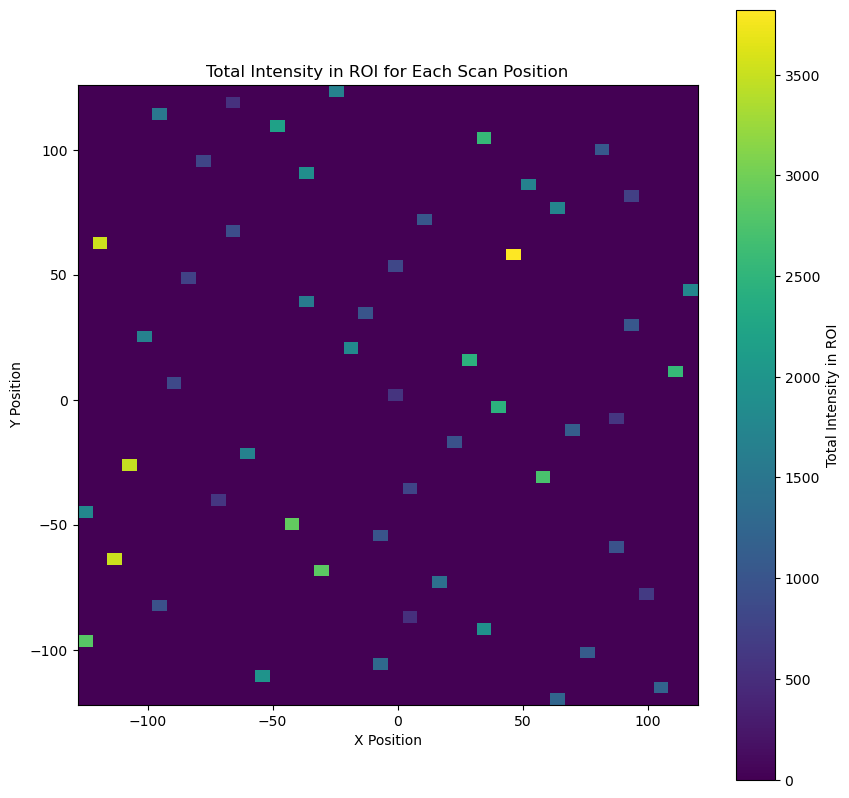

No handles with labels found to put in legend.


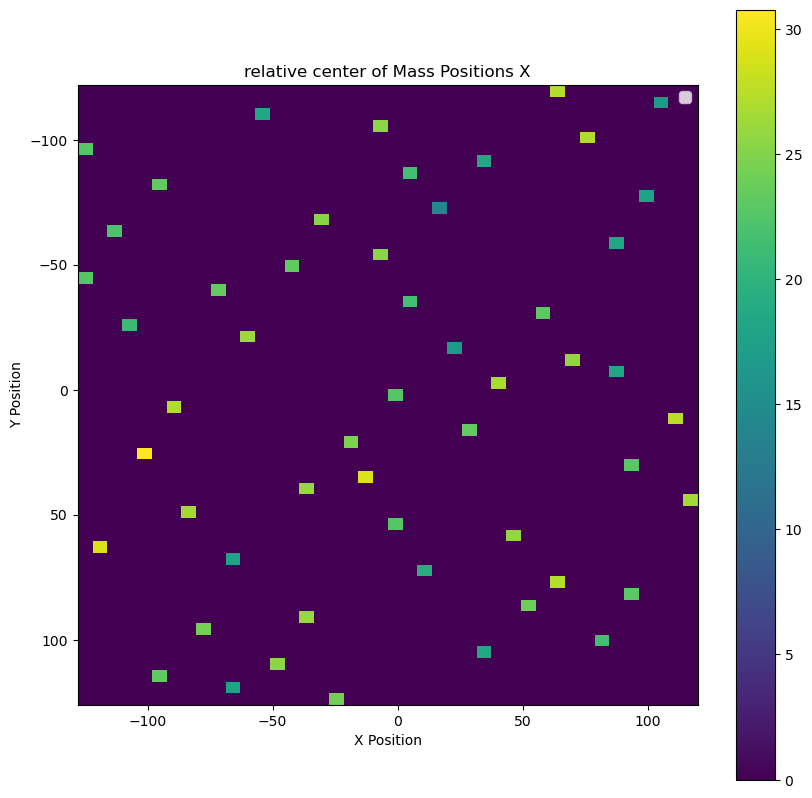

No handles with labels found to put in legend.


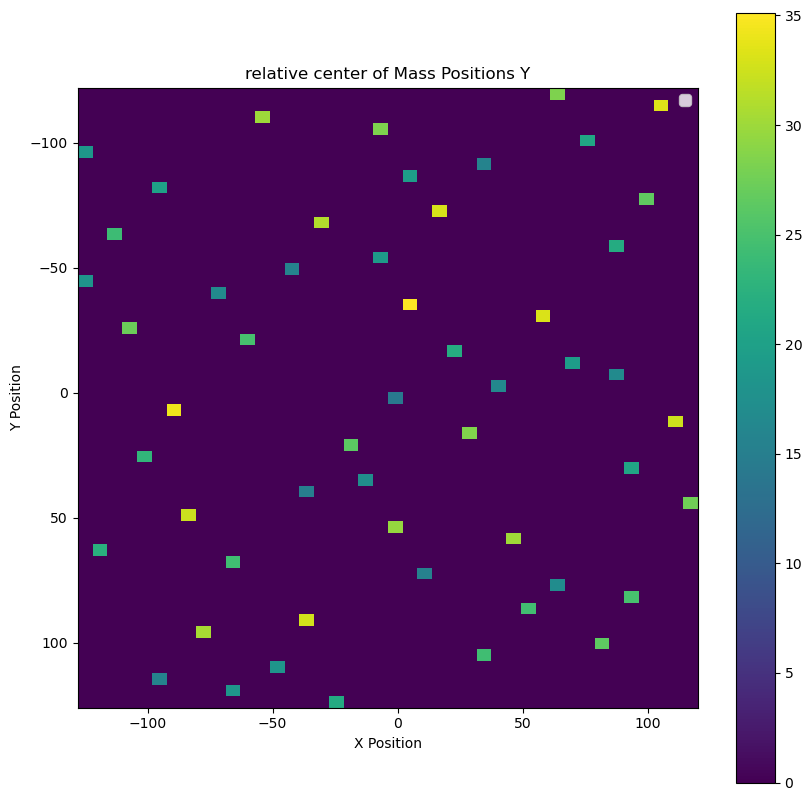

In [10]:
from scipy.ndimage import center_of_mass

roi_x = 100
roi_y = 200
roi_width = 50
roi_height = 50

intensity_values = []
com_global_x_ls = []
com_global_y_ls = []

for frame in data:
    roi = frame[roi_y:roi_y + roi_height, roi_x:roi_x + roi_width]
    total_intensity_in_roi = np.sum(roi)
    intensity_values.append(total_intensity_in_roi)

    com_y, com_x = center_of_mass(roi)
    com_global_x = com_x #roi_x + com_x
    com_global_y = com_y #roi_y + com_y
    com_global_x_ls.append(com_global_x)
    com_global_y_ls.append(com_global_y)

unique_x_positions = np.unique(x_positions)
unique_y_positions = np.unique(y_positions)
intensity_matrix = np.zeros((len(unique_y_positions), len(unique_x_positions)))
com_x_matrix = np.zeros((len(unique_y_positions), len(unique_x_positions)))
com_y_matrix = np.zeros((len(unique_y_positions), len(unique_x_positions)))

for i, (x, y, intensity) in enumerate(zip(x_positions, y_positions, intensity_values)):
    x_idx = np.where(unique_x_positions == x)[0][0]
    y_idx = np.where(unique_y_positions == y)[0][0]
    intensity_matrix[y_idx, x_idx] = intensity
# print(x_positions, y_positions, intensity_values)
# print(intensity_matrix)
    
for i, (x, y, intensity) in enumerate(zip(x_positions, y_positions, com_global_x_ls)):
    x_idx = np.where(unique_x_positions == x)[0][0]
    y_idx = np.where(unique_y_positions == y)[0][0]
    com_x_matrix[y_idx, x_idx] = intensity
    
for i, (x, y, intensity) in enumerate(zip(x_positions, y_positions, com_global_y_ls)):
    x_idx = np.where(unique_x_positions == x)[0][0]
    y_idx = np.where(unique_y_positions == y)[0][0]
    com_y_matrix[y_idx, x_idx] = intensity

plt.figure(figsize=(10, 10))
plt.imshow(intensity_matrix, cmap='viridis', extent=(min(x_positions), max(x_positions), min(y_positions), max(y_positions)), origin='lower')
plt.colorbar(label='Total Intensity in ROI')
plt.title('Total Intensity in ROI for Each Scan Position')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.show()

# com_x_positions, com_y_positions = zip(*com_positions)

plt.figure(figsize=(10, 10))
plt.imshow(com_x_matrix,  cmap='viridis', extent=(min(x_positions), max(x_positions), min(y_positions), max(y_positions)), origin='lower')
plt.colorbar()
plt.title('relative center of Mass Positions X')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(com_y_matrix,  cmap='viridis', extent=(min(x_positions), max(x_positions), min(y_positions), max(y_positions)), origin='lower')
plt.colorbar()
plt.title('relative center of Mass Positions Y')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.gca().invert_yaxis()
plt.show()